In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import math
from tqdm import tqdm
from multiprocessing import Process, Pool
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
def convert_temporal_data(dataframe):
  '''
  Convert temporal variables from seconds to hours.

  This conversion is necessary. Otherwise, large predictor values (e.g., p^6)
  will be irrelevant for OLS.
  '''

  for column in ['p', 'r']:
    dataframe[column] = dataframe[column] / 3600

  return dataframe

def read_score_distribution(csv_file):
  columns = ['p', 'q', 'r', 'score']
  distribution = pd.read_csv(csv_file, names=columns,skiprows=1)
  distribution = convert_temporal_data(distribution)

  return distribution

In [4]:
def add_quadratic_predictors(dataframe):
  dataframe[['p2', 'q2', 'r2']] = dataframe[['p', 'q', 'r']]**2
  dataframe['pq'] = dataframe['p']*dataframe['q']

  return dataframe

def add_cubic_predictors(dataframe):
  dataframe[['p3', 'q3', 'r3']] = dataframe[['p', 'q', 'r']]**3
  dataframe['p2q'] = dataframe['p']**2 * dataframe['q']
  dataframe['pq2'] = dataframe['p'] * dataframe['q']**2

  return dataframe

def add_quartic_predictiors(dataframe):
  dataframe[['p4', 'q4', 'r4']] = dataframe[['p', 'q', 'r']]**4
  dataframe['p3q'] = dataframe['p']**3 * dataframe['q']
  dataframe['p2q2'] = dataframe['p']**2 * dataframe['q']**2
  dataframe['pq3'] = dataframe['p'] * dataframe['q']**3

  return dataframe

def add_quintic_predictors(dataframe):
  dataframe[['p5', 'q5', 'r5']] = dataframe[['p', 'q', 'r']]**5
  dataframe['p4q'] = dataframe['p']**4 * dataframe['q']
  dataframe['p3q2'] = dataframe['p']**3 * dataframe['q']**2
  dataframe['p2q3'] = dataframe['p']**2 * dataframe['q']**3
  dataframe['pq4'] = dataframe['p'] * dataframe['q']**4

  return dataframe

def add_sextic_predictors(dataframe):
  dataframe[['p6', 'q6', 'r6']] = dataframe[['p', 'q', 'r']]**6
  dataframe['p5q'] = dataframe['p']**5 * dataframe['q']
  dataframe['p4q2'] = dataframe['p']**4 * dataframe['q']**2
  dataframe['p3q3'] = dataframe['p']**3 * dataframe['q']**3
  dataframe['p2q4'] = dataframe['p']**2 * dataframe['q']**4
  dataframe['pq5'] = dataframe['p'] * dataframe['q']**5

  return dataframe
def only_att_predictors(dataframe):
    dataframe[['p2', 'q2', 'r2']] = dataframe[['p', 'q', 'r']]**2
    dataframe[['p3', 'q3', 'r3']] = dataframe[['p', 'q', 'r']]**3
    dataframe[['p4', 'q4', 'r4']] = dataframe[['p', 'q', 'r']]**4
    dataframe[['p5', 'q5', 'r5']] = dataframe[['p', 'q', 'r']]**5
    dataframe[['p6', 'q6', 'r6']] = dataframe[['p', 'q', 'r']]**6

    return dataframe
def only_wq_att_predictors(dataframe):
    dataframe[['p2', 'r2']] = dataframe[['p', 'r']]**2
    dataframe[['p3',  'r3']] = dataframe[['p', 'r']]**3
    dataframe[['p4',  'r4']] = dataframe[['p', 'r']]**4
    dataframe[['p5',  'r5']] = dataframe[['p', 'r']]**5
    dataframe[['p6',  'r6']] = dataframe[['p', 'r']]**6

    return dataframe
def only_lin_predictors(dataframe):
    dataframe['pq'] = dataframe['p']*dataframe['q']
    dataframe['p2q'] = dataframe['p']**2 * dataframe['q']
    dataframe['pq2'] = dataframe['p'] * dataframe['q']**2
    dataframe['p3q'] = dataframe['p']**3 * dataframe['q']
    dataframe['p2q2'] = dataframe['p']**2 * dataframe['q']**2
    dataframe['pq3'] = dataframe['p'] * dataframe['q']**3
    dataframe['p4q'] = dataframe['p']**4 * dataframe['q']
    dataframe['p3q2'] = dataframe['p']**3 * dataframe['q']**2
    dataframe['p2q3'] = dataframe['p']**2 * dataframe['q']**3
    dataframe['pq4'] = dataframe['p'] * dataframe['q']**4

    return dataframe
def only_lin_predictors_pr(dataframe):
    dataframe['pr'] = dataframe['p']*dataframe['r']
    dataframe['p2r'] = dataframe['p']**2 * dataframe['r']
    dataframe['pr2'] = dataframe['p'] * dataframe['r']**2
    dataframe['p3r'] = dataframe['p']**3 * dataframe['r']
    dataframe['p2r2'] = dataframe['p']**2 * dataframe['r']**2
    dataframe['p4r'] = dataframe['p']**4 * dataframe['r']
    dataframe['p3r2'] = dataframe['p']**3 * dataframe['r']**2
    dataframe['p2r3'] = dataframe['p']**2 * dataframe['r']**3
    dataframe['pr4'] = dataframe['p'] * dataframe['r']**4

    return dataframe

In [5]:
def create_quadratic_polynomial(dataframe):
  dataframe = add_quadratic_predictors(dataframe)
  return dataframe

def create_cubic_polynomial(dataframe):
  dataframe = add_cubic_predictors(
              add_quadratic_predictors(dataframe))
  return dataframe

def create_quartic_polynomial(dataframe):
  dataframe = add_quartic_predictiors(
              add_cubic_predictors(
              add_quadratic_predictors(dataframe)))
  return dataframe

def create_quintic_polynomial(dataframe):
  dataframe = add_quintic_predictors(
              add_quartic_predictiors(
              add_cubic_predictors(
              add_quadratic_predictors(dataframe))))
  return dataframe

def create_sextic_polynomial(dataframe):
  dataframe = add_sextic_predictors(
              add_quintic_predictors(
              add_quartic_predictiors(
              add_cubic_predictors(
              add_quadratic_predictors(dataframe)))))
  return dataframe

In [37]:
variables = ['p', 'q', 'r']
degre_max = 4

# Générer les combinaisons
possibilites = []
possibilites.append("sqrt(p)")
possibilites.append("sqrt(q)")
possibilites.append("sqrt(r)")
for degre in range(2, degre_max + 1):
    for variable in variables:
        possibilites.append(variable + str(degre))

for degre in range(2, degre_max + 1):
    for i in range(len(variables)):
        for j in range(i + 1, len(variables)):
            possibilites.append(variables[i] + str(degre) + variables[j])
            possibilites.append(variables[j] + str(degre) + variables[i])



# Afficher les combinaisons
print (possibilites)

['sqrt(p)', 'sqrt(q)', 'sqrt(r)', 'p2', 'q2', 'r2', 'p3', 'q3', 'r3', 'p4', 'q4', 'r4', 'p2q', 'q2p', 'p2r', 'r2p', 'q2r', 'r2q', 'p3q', 'q3p', 'p3r', 'r3p', 'q3r', 'r3q', 'p4q', 'q4p', 'p4r', 'r4p', 'q4r', 'r4q']


In [77]:
import copy
history=[]
names=[]
def grid_search (dataframe, n):
    best_vif=[100000000000000]*5
    best_set=[[],[],[],[],[]]
    comb=list(itertools.combinations(possibilites,n))
    for var_set in tqdm(comb, desc="Progression"):
        
        df_copy = dataframe.copy()
        
        # Appliquer les transformations pour chaque variable dans l'ensemble
        for var in var_set:
            
            if var.startswith('sqrt'):
                
                root_var = var[-2]  # Récupérer la variable ('p', 'q' ou 'r') à partir de la variable sqrt
                df_copy[var] = df_copy[root_var].apply(math.sqrt)
                
            elif var.startswith(('p', 'q', 'r'))and len(var)==2:
                power = int(var[1:]) if len(var) > 1 else 1  # Récupérer l'exposant du polynôme
                base_var = var[0]  # Récupérer la variable ('p', 'q' ou 'r') à partir de la variable polynomiale
                df_copy[var] = df_copy[base_var] ** power
            elif var in ['p2q', 'q2p', 'p2r', 'r2p', 'q2r', 'r2q']:
                var_1, var_2 = var[0], var[2]  # Récupérer les deux variables ('p', 'q' ou 'r') de la combinaison
                df_copy[var] = (df_copy[var_1] **2) * df_copy[var_2]
            elif var in ['p3q', 'q3p', 'p3r', 'r3p', 'q3r', 'r3q']:
                var_1, var_2 = var[0], var[2]  # Récupérer les trois variables ('p', 'q' ou 'r') de la combinaison
                df_copy[var] = (df_copy[var_1]**3) * df_copy[var_2] 
            elif var in ['p4q', 'q4p', 'p4r', 'r4p', 'q4r', 'r4q']:
                var_1, var_2 = var[0], var[2] # Récupérer les quatre variables ('p', 'q' ou 'r') de la combinaison
                df_copy[var] = (df_copy[var_1]**4) * df_copy[var_2]
        res=compute_vif(df_copy)
        max=np.max(res['VIF'])
        history.append(max)
        if n==1 : 
            names.append(var_set[-1])
        else : 
            res= var_set[0]
            for var in var_set:
                if var != var_set[0]:
                    res += "-"+var
            names.append(res)
        b=False
        idx=0
        for best in best_vif:
            if max<best:
                b=True
                break
            idx+=1
        if b==True:
            tmp_vif=best_vif.copy()
            tmp_set=best_set.copy()
            for i in range (idx+1,5):
                
                tmp_vif[i]=best_vif[i-1]
                tmp_set[i]=best_set[i-1]
            tmp_vif[idx]=max
            tmp_set[idx]=var_set
            best_vif=tmp_vif
            best_set=tmp_set
        
            
    with open("grid.csv", "a+") as res:
        res.write(str(n))
        res.write(',')
        res.write(str(best_vif))
        res.write(',')
        res.write(str(best_set))
        res.write('\n')
    print(best_vif)
    print(best_set)


In [9]:
def compute_vif(features):
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [10]:
csv_file = "data/global_training_data_GA.csv"
raw_dist = read_score_distribution(csv_file)

In [11]:
features_label = ['p', 'q', 'r']
target_label = ["score"]
features = raw_dist[features_label]
target = raw_dist[target_label]
features

,p,q,r
0,0.009444,2,4.613333
1,0.002222,32,4.627500
2,0.049167,16,4.908333
3,0.014444,1,4.928889
4,2.546944,128,4.931667
...,...,...,...
81339,3.888611,32,19.506111
81340,0.280833,64,19.533889
81341,0.001111,1,83.753056
81342,0.018889,2,83.766111


Progression: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 21.19it/s]


[1.2727909787859337, 1.2732833554626957, 1.2748930977117752, 1.2759070896436475, 1.278522341251807]
[('r4p',), ('r3p',), ('r4q',), ('r3q',), ('r2q',)]


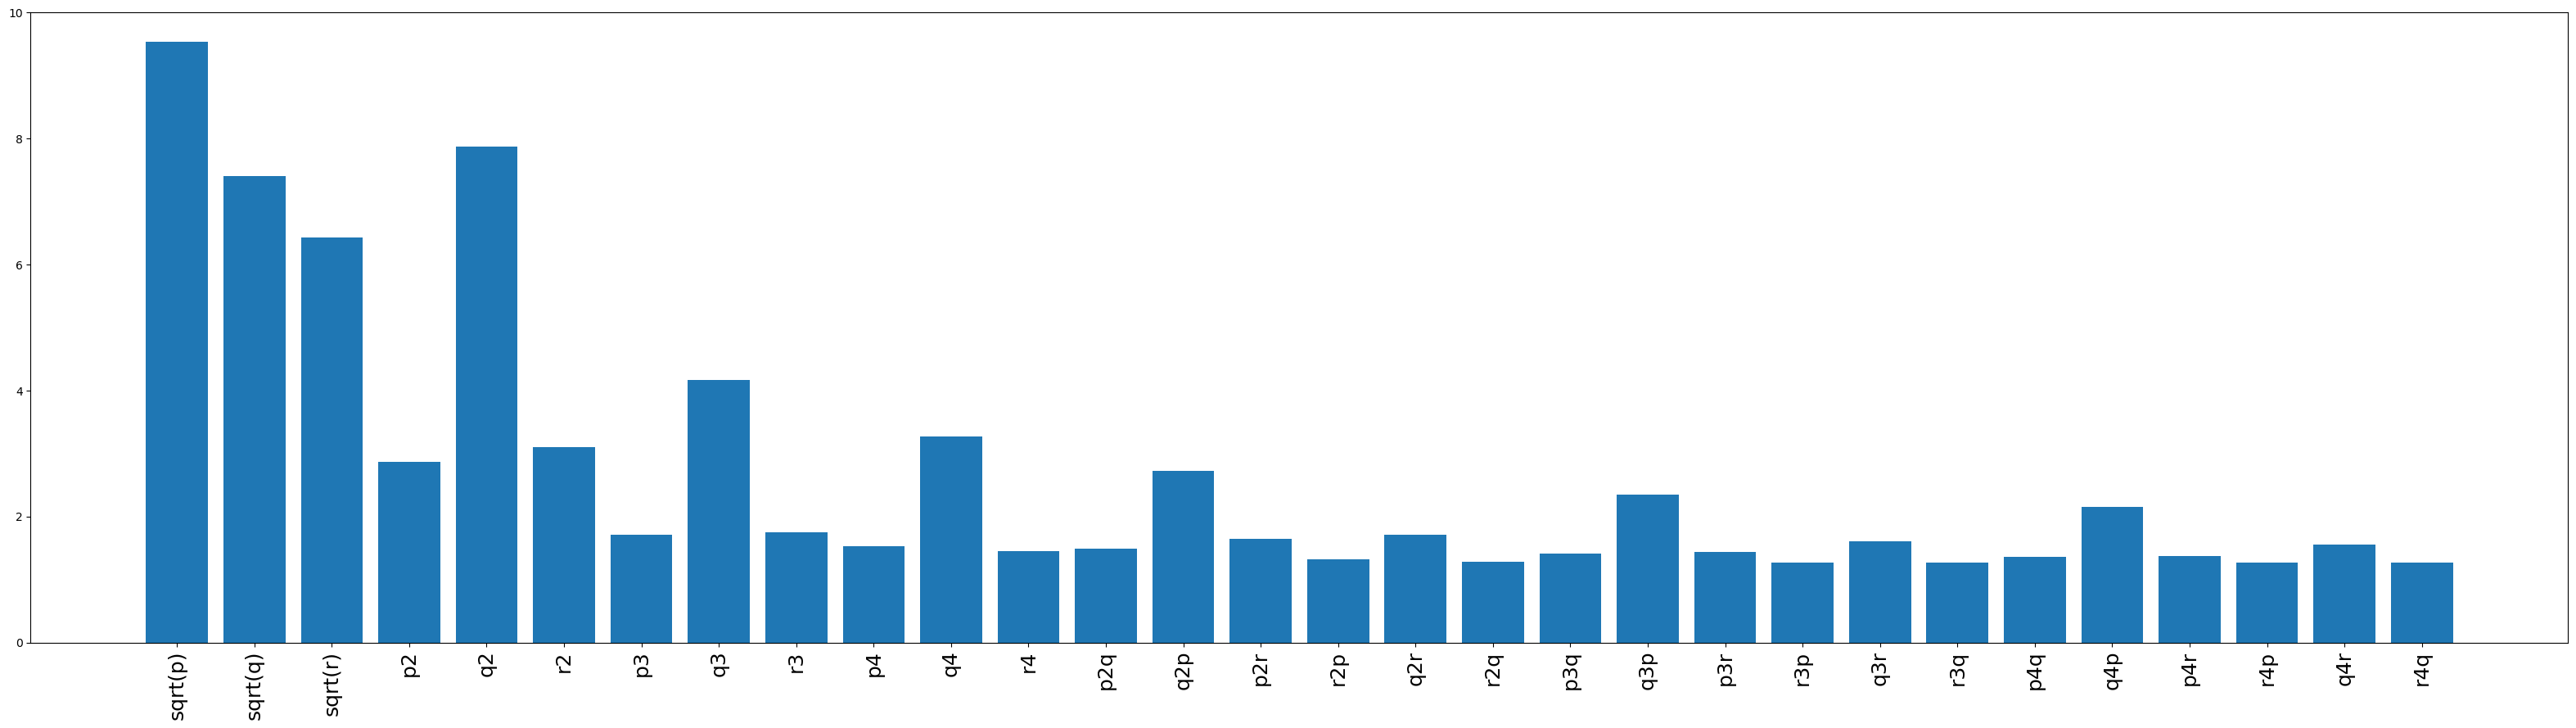

In [91]:
history=[]
names=[]
grid_search(features, 1)
plt.figure(figsize=(40, 10))
data=pd.Series(history,index=names)
plt.bar(names,history)
plt.xticks(rotation=90,fontsize=18)
plt.savefig("../plots/grid_1.png")
plt.show()


In [84]:
print (names)

['sqrt(p)', 'sqrt(q)', 'sqrt(r)', 'p2', 'q2', 'r2', 'p3', 'q3', 'r3', 'p4', 'q4', 'r4', 'p2q', 'q2p', 'p2r', 'r2p', 'q2r', 'r2q', 'p3q', 'q3p', 'p3r', 'r3p', 'q3r', 'r3q', 'p4q', 'q4p', 'p4r', 'r4p', 'q4r', 'r4q']


In [33]:
print(np.max(compute_vif(features)["VIF"]))

1.2727812286448872


In [34]:
features


,p,q,r
0,0.000000,1,0.000556
1,0.009444,2,4.613333
2,0.002222,32,4.627500
3,0.049167,16,4.908333
4,0.014444,1,4.928889
...,...,...,...
81340,3.888611,32,19.506111
81341,0.280833,64,19.533889
81342,0.001111,1,83.753056
81343,0.018889,2,83.766111


In [21]:
p=[]
for i in range (2,3):
    p.append(Process(target=grid_search,args=(features,i)))
    p[i-2].start()
    
for proc in p:
    proc.join()
    
        

Progression: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 435/435 [00:35<00:00, 12.22it/s]


1.2862065211525044
('r3q', 'r4p')


In [ ]:
res=only_lin_predictors_pr(features)
vif=compute_vif(res)
print (vif)
print("mean = ",np.mean(vif.VIF))

In [ ]:
compute_vif(create_quadratic_polynomial(features))

In [ ]:
compute_vif(create_cubic_polynomial(features))

In [ ]:
compute_vif(create_quartic_polynomial(features))

In [ ]:
compute_vif(create_quintic_polynomial(features))

In [ ]:
compute_vif(features)